<a href="https://colab.research.google.com/github/programacaodinamica/analise-dados/blob/master/notebooks/Visualizando_COVID_com_Flourish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados de COVID-19 no Brasil do Ministério da Saúde disponíveis em [covid.saude.gov.br](https://covid.saude.gov.br/)

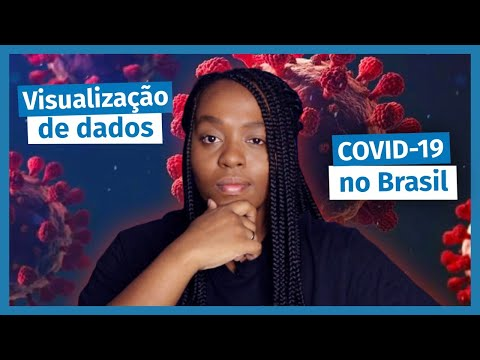

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('f2OnyNQfpv0')

In [ ]:
import pandas as pd

In [ ]:
covid_brasil = pd.read_csv("/content/drive/MyDrive/Colab Datasets/MC01/HIST_PAINEL_COVIDBR_27mar2021.csv", sep=';')

In [ ]:
covid_brasil.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [ ]:
covid_estados = covid_brasil.dropna( subset=['estado'])

In [ ]:
covid_estados = covid_estados[pd.isnull(covid_estados['municipio'])]

In [ ]:
covid_estados['letalidade_novos'] = (covid_estados['obitosNovos']/covid_estados['casosNovos']).fillna(0)

In [ ]:
covid_estados.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,letalidade
399,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0
400,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0
401,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0
402,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0
403,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0


In [ ]:
covid_estados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18405 entries, 399 to 1967021
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   regiao                  18405 non-null  object 
 1   estado                  18405 non-null  object 
 2   municipio               0 non-null      object 
 3   coduf                   18405 non-null  int64  
 4   codmun                  7686 non-null   float64
 5   codRegiaoSaude          0 non-null      float64
 6   nomeRegiaoSaude         0 non-null      object 
 7   data                    18405 non-null  object 
 8   semanaEpi               18405 non-null  int64  
 9   populacaoTCU2019        10719 non-null  float64
 10  casosAcumulado          18405 non-null  int64  
 11  casosNovos              18405 non-null  int64  
 12  obitosAcumulado         18405 non-null  int64  
 13  obitosNovos             18405 non-null  int64  
 14  Recuperadosnovos        0 non-null

In [ ]:
covid_estados['casos_novos_por_cem_mil'] = (covid_estados['casosNovos']/covid_estados['populacaoTCU2019'])*100000
covid_estados['casos_acum_por_cem_mil'] = (covid_estados['casosAcumulado']/covid_estados['populacaoTCU2019'])*100000
covid_estados['obitos_novos_por_cem_mil'] = (covid_estados['obitosNovos']/covid_estados['populacaoTCU2019'])*100000
covid_estados['obitos_acum_por_cem_mil'] = (covid_estados['obitosAcumulado']/covid_estados['populacaoTCU2019'])*100000

In [ ]:
covid_estados['mes_ano'] = pd.to_datetime(covid_estados['data']).dt.to_period('M')

In [ ]:
covid_estados.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,letalidade,mes_ano,casos_novos_por_cem_mil,casos_acum_por_cem_mil,obitos_novos_por_cem_mil,obitos_acum_por_cem_mil
399,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0,2020-02,0.0,0.0,0.0,0.0
400,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0,2020-02,0.0,0.0,0.0,0.0
401,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0,2020-02,0.0,0.0,0.0,0.0
402,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0,2020-02,0.0,0.0,0.0,0.0
403,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN,NaN,NaN,0.0,2020-02,0.0,0.0,0.0,0.0


In [ ]:
covid_estados.to_csv('covid_estados.csv')